<a href="https://colab.research.google.com/github/gfeyzakorkmaz/gfeyzakorkmaz/blob/main/pythonday56.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
path = '/content/drive/MyDrive/Dataset/complex_marketing_data_enriched.xlsx'

In [3]:
df = pd.read_excel(path)

In [4]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

features = df[['Total Spent', 'Discount Availed', 'Customer Tenure (Years)']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

dbscan = DBSCAN(eps=1.2, min_samples=3)
df['Segment'] = dbscan.fit_predict(scaled_features)

print(df['Segment'].value_counts())

Segment
 0    5
 3    5
 1    4
 2    3
-1    3
Name: count, dtype: int64


Purchased Category
Books          2350
Home Goods     2090
Electronics    1680
Clothing       1600
Beauty         1200
Name: Total Spent, dtype: int64


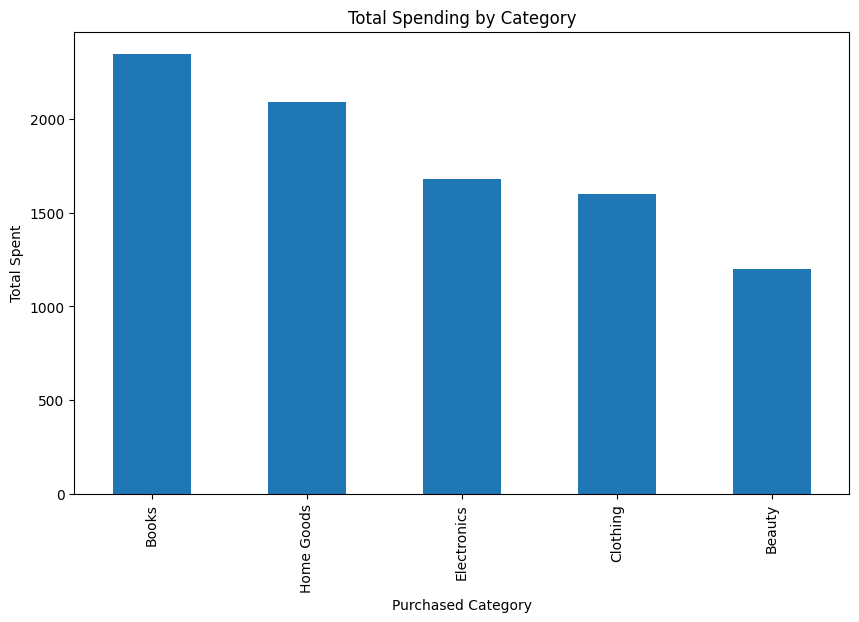

In [6]:
import matplotlib.pyplot as plt

category_performance = df.groupby('Purchased Category')['Total Spent'].sum().sort_values(ascending=False)
print(category_performance)

category_performance.plot(kind='bar', figsize=(10, 6), title='Total Spending by Category')
plt.xlabel('Purchased Category')
plt.ylabel('Total Spent')
plt.show()

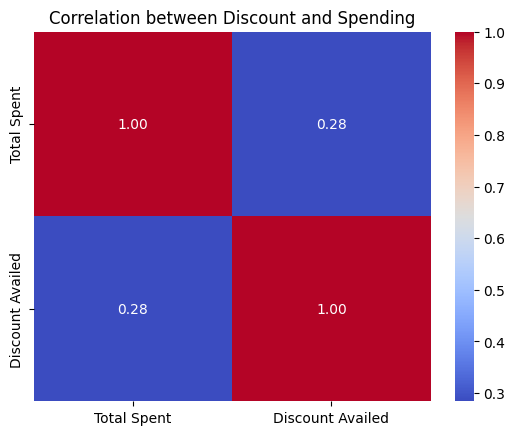

In [8]:
import seaborn as sns

correlation = df[['Total Spent', 'Discount Availed']].corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Discount and Spending')
plt.show()

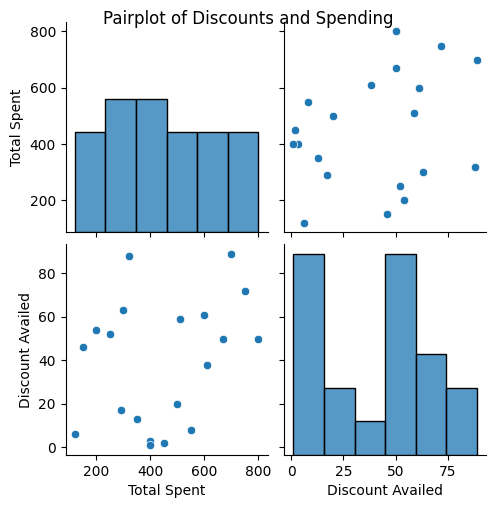

In [12]:
sns.pairplot(df[['Total Spent', 'Discount Availed']])
plt.suptitle('Pairplot of Discounts and Spending', y=1)
plt.show()


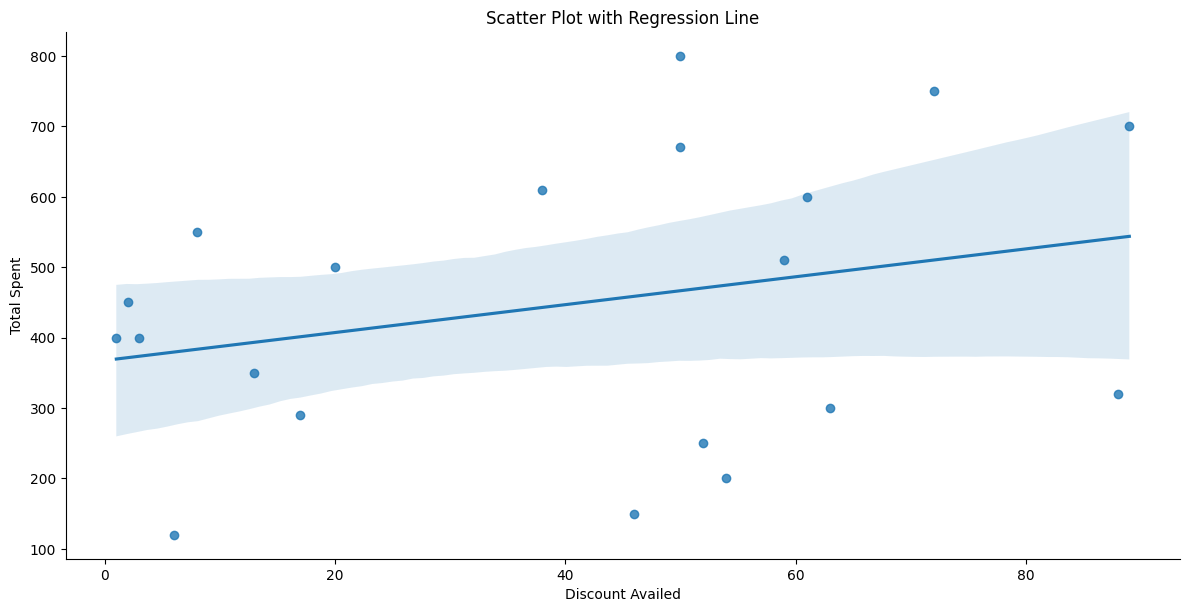

In [14]:
sns.lmplot(x='Discount Availed', y='Total Spent', data=df, aspect=2, height=6)
plt.title('Scatter Plot with Regression Line')
plt.xlabel('Discount Availed')
plt.ylabel('Total Spent')
plt.show()


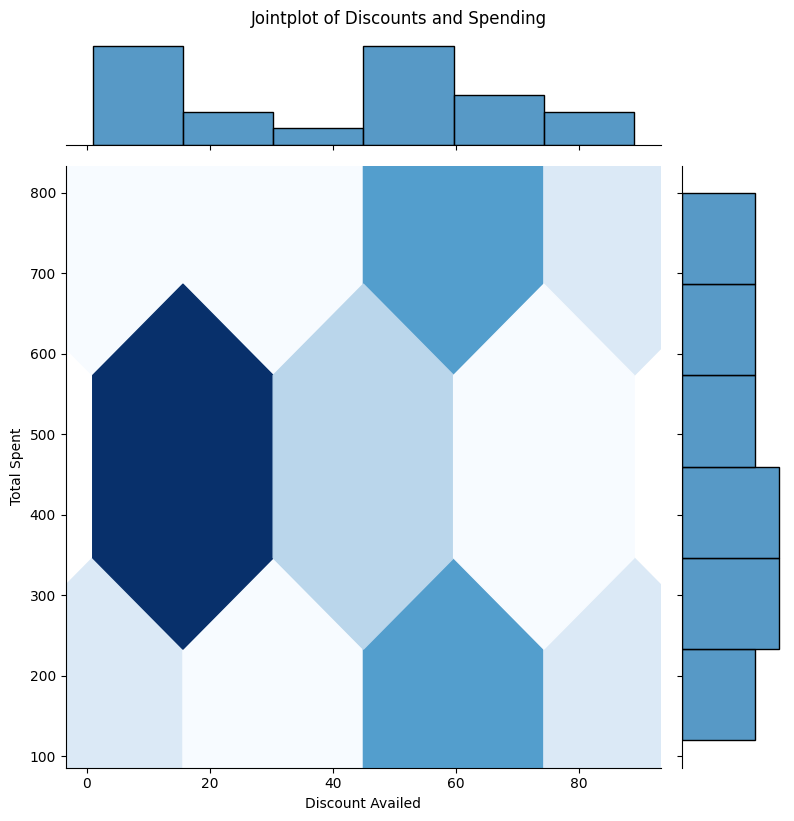

In [16]:
sns.jointplot(x='Discount Availed', y='Total Spent', data=df, kind='hex', height=8, cmap='Blues')
plt.suptitle('Jointplot of Discounts and Spending', y=1.02)
plt.show()


<ipython-input-17-4c9fc612ae28>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Discount Availed', y='Total Spent', data=df, palette='muted')


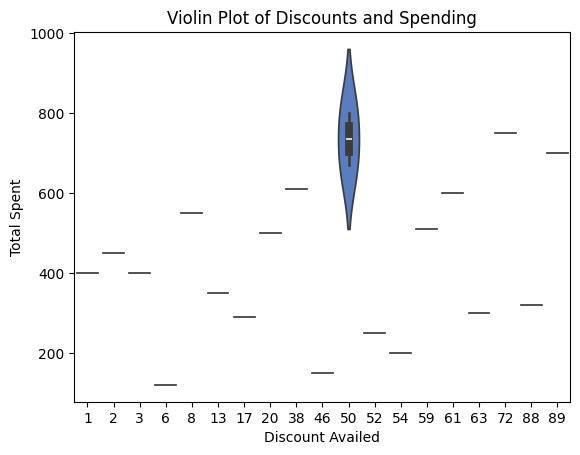

In [17]:
sns.violinplot(x='Discount Availed', y='Total Spent', data=df, palette='muted')
plt.title('Violin Plot of Discounts and Spending')
plt.xlabel('Discount Availed')
plt.ylabel('Total Spent')
plt.show()


<ipython-input-18-c1afe5d2c571>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_spending = df.groupby(discount_bins)['Total Spent'].mean()


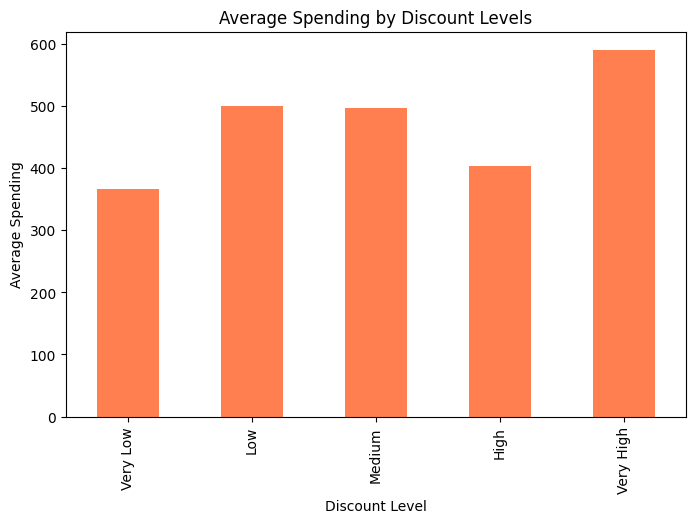

In [18]:
discount_bins = pd.cut(df['Discount Availed'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
avg_spending = df.groupby(discount_bins)['Total Spent'].mean()

avg_spending.plot(kind='bar', color='coral', figsize=(8, 5), title='Average Spending by Discount Levels')
plt.xlabel('Discount Level')
plt.ylabel('Average Spending')
plt.show()


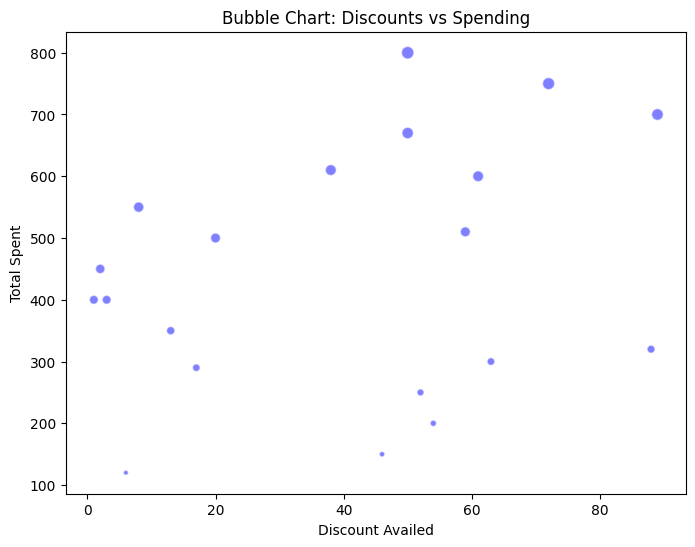

In [19]:

plt.figure(figsize=(8, 6))
plt.scatter(df['Discount Availed'], df['Total Spent'],
            s=df['Total Spent'] * 0.1, alpha=0.5, c='blue', edgecolors='w')
plt.title('Bubble Chart: Discounts vs Spending')
plt.xlabel('Discount Availed')
plt.ylabel('Total Spent')
plt.show()


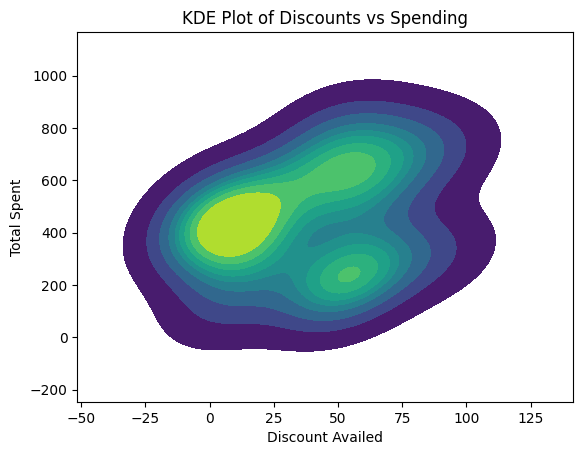

In [20]:

sns.kdeplot(x=df['Discount Availed'], y=df['Total Spent'], cmap='viridis', fill=True)
plt.title('KDE Plot of Discounts vs Spending')
plt.xlabel('Discount Availed')
plt.ylabel('Total Spent')
plt.show()


<ipython-input-21-d548c95da00b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='Discount Availed', y='Total Spent', data=df, size=6, palette='Set2')


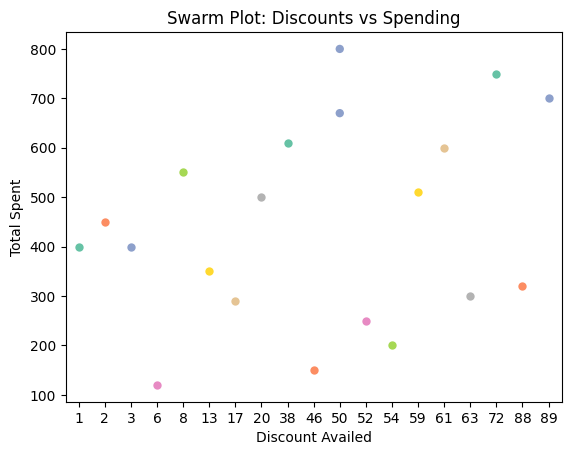

In [21]:
sns.swarmplot(x='Discount Availed', y='Total Spent', data=df, size=6, palette='Set2')
plt.title('Swarm Plot: Discounts vs Spending')
plt.xlabel('Discount Availed')
plt.ylabel('Total Spent')
plt.show()


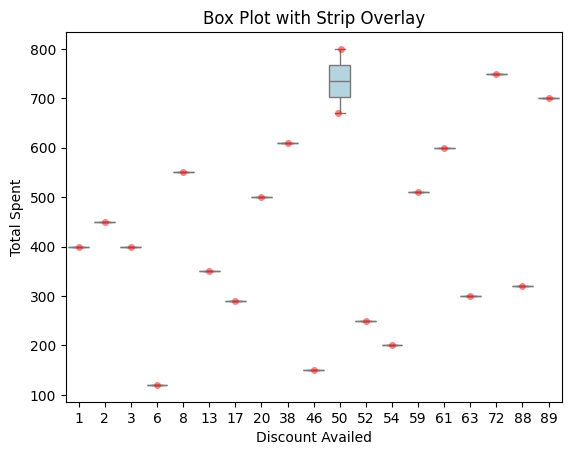

In [22]:
sns.boxplot(x='Discount Availed', y='Total Spent', data=df, color='lightblue')
sns.stripplot(x='Discount Availed', y='Total Spent', data=df, color='red', alpha=0.5, jitter=True)
plt.title('Box Plot with Strip Overlay')
plt.xlabel('Discount Availed')
plt.ylabel('Total Spent')
plt.show()


/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:178: RuntimeWarning: invalid value encountered in divide
  y = (s * row_).sum(axis=0) / row.sum()


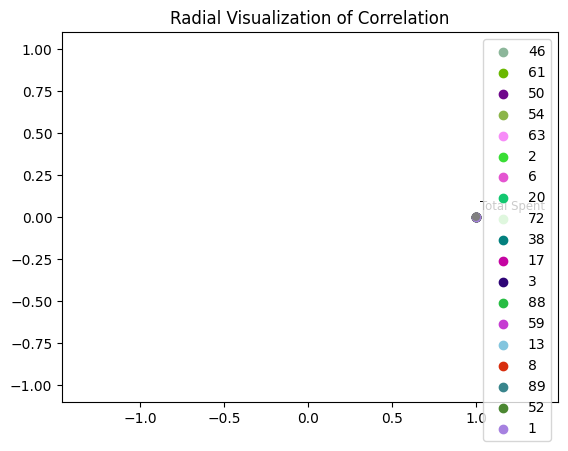

In [25]:
from pandas.plotting import radviz


radviz(df[['Total Spent', 'Discount Availed']], class_column='Discount Availed')
plt.title('Radial Visualization of Correlation')
plt.show()


In [27]:
!pip install joypy

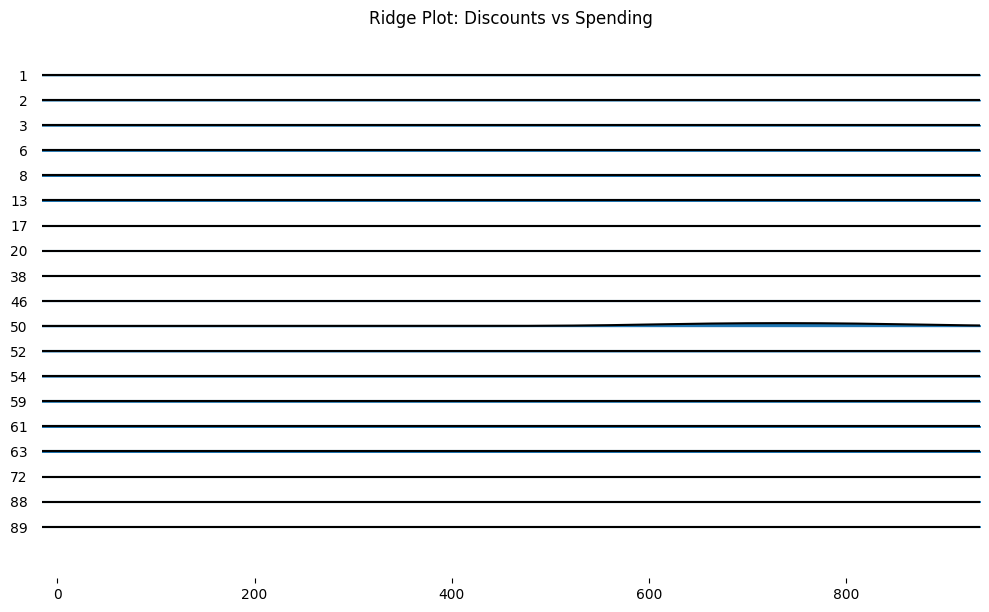

In [28]:
import joypy

joypy.joyplot(data=df[['Discount Availed', 'Total Spent']],
              by='Discount Availed', figsize=(10, 6))
plt.title('Ridge Plot: Discounts vs Spending')
plt.show()


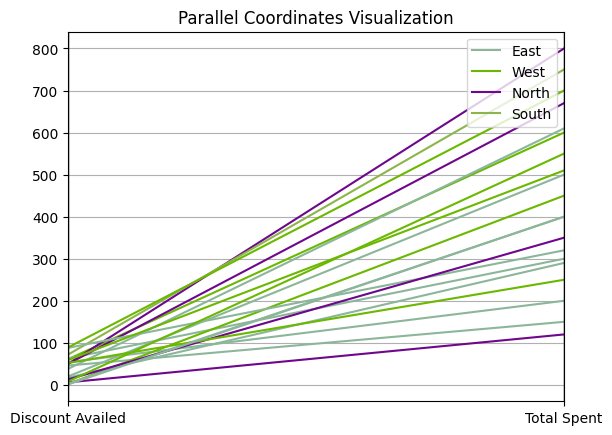

In [30]:
from pandas.plotting import parallel_coordinates

parallel_coordinates(df[['Discount Availed', 'Total Spent', 'Region']], class_column='Region')
plt.title('Parallel Coordinates Visualization')
plt.show()


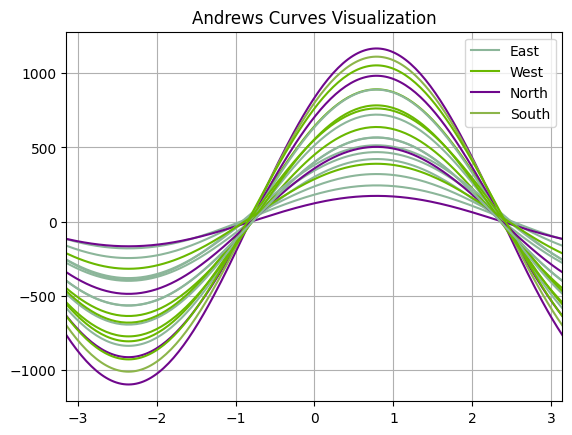

In [31]:
from pandas.plotting import andrews_curves

andrews_curves(df[['Discount Availed', 'Total Spent', 'Region']], class_column='Region')
plt.title('Andrews Curves Visualization')
plt.show()


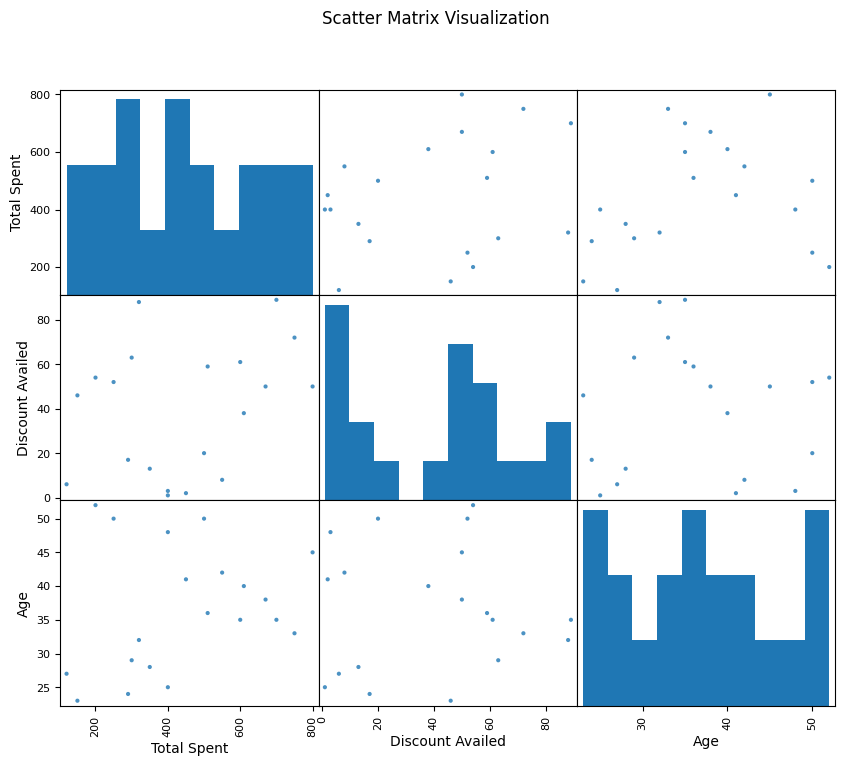

In [32]:
from pandas.plotting import scatter_matrix

scatter_matrix(df[['Total Spent', 'Discount Availed', 'Age']], alpha=0.8, figsize=(10, 8), diagonal='hist')
plt.suptitle('Scatter Matrix Visualization')
plt.show()


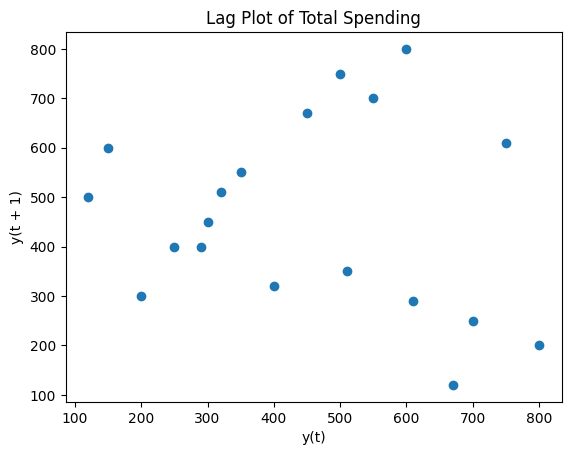

In [33]:
from pandas.plotting import lag_plot


lag_plot(df['Total Spent'])
plt.title('Lag Plot of Total Spending')
plt.show()


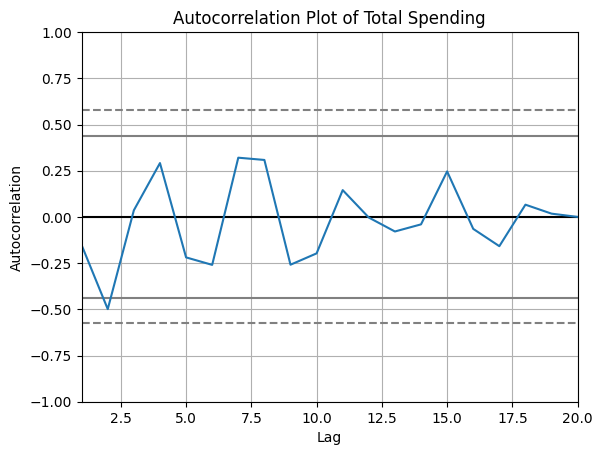

In [34]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['Total Spent'])
plt.title('Autocorrelation Plot of Total Spending')
plt.show()
